In [30]:
import numpy as np 
import matplotlib.pyplot as plt

(2, 99001)


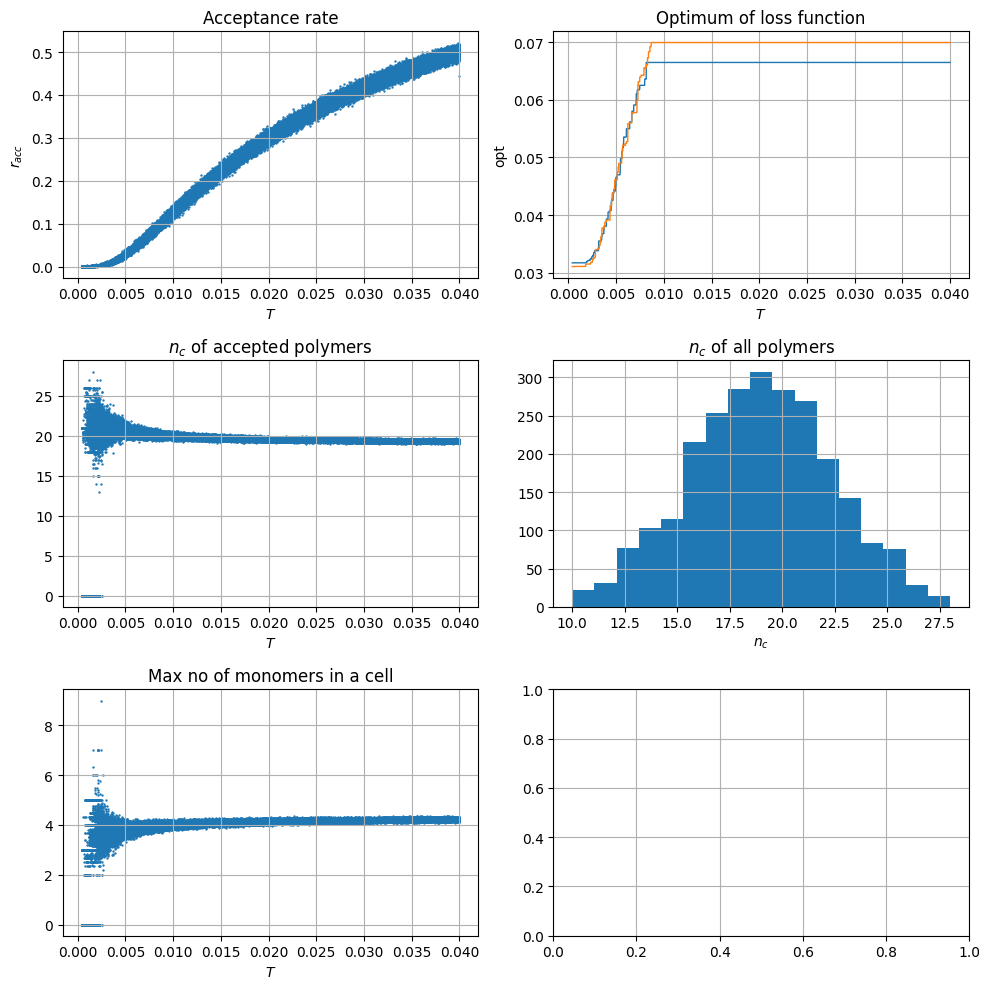

In [34]:
Nbars=[100]
n_cells=40*40
V=25
V_cell=(1/8)**2
N=32
kappa=30/32
fig, axs = plt.subplots(3, 2, figsize=(10, 10),dpi=100)
axs=axs.flatten()
for i in range(len(axs)):
    axs[i].grid()

axs[0].set_title("Acceptance rate")
axs[1].set_title("Optimum of loss function")
axs[2].set_title("$n_c$ of accepted polymers")
axs[3].set_title("$n_c$ of all polymers")
axs[4].set_title("Max no of monomers in a cell")

axs[0].set_xlabel('$T$')
axs[1].set_xlabel('$T$')
axs[2].set_xlabel('$T$')
axs[4].set_xlabel('$T$')
axs[0].set_ylabel('$r_{acc}$')
axs[1].set_ylabel('opt')
#plt.yscale('log')
for Nbar in Nbars:
    rho0=N*Nbar
    rhoc=rho0*V_cell #beads per cell
    var_phi=1/(rho0*kappa*(1/8)**2) 
    T=np.loadtxt(f"Nbar{Nbar}/T.csv")
    n_T=len(T)#number of temperatures
    acc_rate=np.loadtxt(f"Nbar{Nbar}/acc_rate.csv")
    acc_rate=acc_rate.reshape(int(acc_rate.shape[0]/n_T),n_T).mean(axis=0)
    opt=np.loadtxt(f"Nbar{Nbar}/opt.csv")/(2*n_cells)
    opt=opt.reshape(int(opt.shape[0]/n_T),n_T)
    print(opt.shape)
    num_cells=np.loadtxt(f"Nbar{Nbar}/num_cells.csv") 
    num_cells=num_cells.reshape(int(num_cells.shape[0]/n_T),n_T).mean(axis=0)
    max_monos_cell=np.loadtxt(f"Nbar{Nbar}/max_monos_cell.csv") 
    max_monos_cell=max_monos_cell.reshape(int(max_monos_cell.shape[0]/n_T),n_T).mean(axis=0)
    axs[0].scatter(T,acc_rate,s=0.5,label=r"$\rho_{cell}=$"+f"{rhoc}")
    for i in range(len(opt)):
        axs[1].plot(T,opt[i]/var_phi,lw=1)
    axs[2].scatter(T,num_cells,s=0.5)
    axs[4].scatter(T,max_monos_cell,s=0.5)
#acc_rate=np.loadtxt(f"large_cells/acc_rate.csv")
#acc_rate=acc_rate.reshape(int(acc_rate.shape[0]/n_T),n_T).mean(axis=0)
#plt.plot(T,acc_rate,lw=1)
num_cells_all=np.loadtxt(f"num_cells_Nbar{Nbar}/num_cells.csv")
axs[3].set_xlabel("$n_c$")
axs[3].hist(num_cells_all,bins=17)
plt.tight_layout()
plt.savefig("accrate_1.pdf")
